# Initialization

In [1]:
# Importing required modules
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt
%matplotlib inline

import os
from os.path import exists

## Generating the dataset

In [2]:
def generate_dataset(size, mean):
    ones = int(size * mean)
    while 0.4 <= (ones / size) <= 0.6:
        ones += 1
    lst = [1 if i < ones else 0 for i in range(size)]
    D = np.array(lst)
    np.random.shuffle(D)
    np.save('dataset', D)

In [3]:
## Comment out this block to avoid generating dataset every time the program is run
## Uncomment to generate new dataset

# generate_dataset(size = 160, mean = 0.7)

In [4]:
# Loading the dataset
D = np.load('dataset.npy')
size = D.size
print(f'mu(ML) = {D.mean()}')
print(f'Size of dataset D = {size}')
print(f'D = {D}')

mu(ML) = 0.7
Size of dataset D = 160
D = [1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1]


## Function for plotting pdf of beta distribution

In [5]:
def beta_pdf(x, a, b):
    reg = gamma(a + b) / (gamma(a) * gamma(b))
    pd = (x ** (a - 1)) * ((1 - x) ** (b - 1))
    return reg * pd

In [6]:
mean_beta = {}
def plot_beta(a, b, m = 0, l = 0, name = 'temp', display = True):
    x = np.linspace(0, 1, 201)
    y = beta_pdf(x, a + m, b + l)
    mean_beta[name.split('/')[-1]] = np.mean(x * y)
    plt.plot(x, y)
    plt.gca().set_ylim([0, 12])
    if not exists('plots'):
        os.mkdir('plots')
    if not exists('Results'):
        os.mkdir('Results')
    plt.savefig(name)
    if display:
        plt.show();
    else:
        plt.close();

## Initializing parameters for beta distribution
### Mean of beta distribution = $ \frac {a} {a+b} \approx $ 0.4

In [7]:
a = 2
b = 3

## Generating prior distribution plot

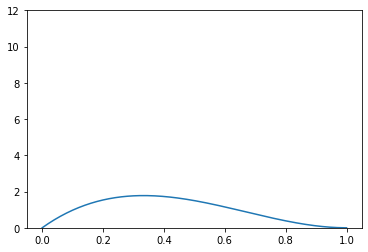

In [8]:
plot_beta(a, b, name = 'Results/prior.png')

# Generating Bob's distribution

In [9]:
# Initialization
h = 0   # Total no of heads till now
t = 0   # Total no of tails till now

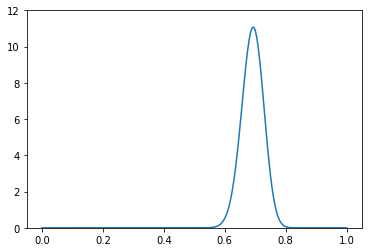

Posterior curve for Bob


In [10]:
# Plots will be saved in '/plots' folder
plot_beta(a, b, name = 'plots/0.png', display = False)
for i in range(1, size + 1):
    r = D[i - 1]

    # m and l will be taken only for single datapoint
    m = int(r == 1)
    l = int(r == 0)

    # a+h and b+t were parameters from previous distribution
    plot_beta(a + h, b + t, m, l, name = f'plots/{i}.png', display = (i == size))

    # Updating the parameters for next datapoint
    if r == 1:
        h += 1
    else:
        t += 1
print('Posterior curve for Bob')

## Visualizing mean change

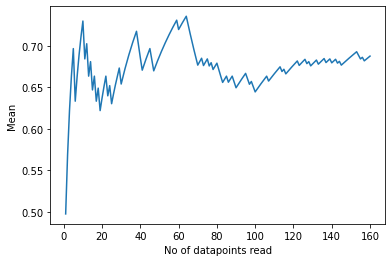

In [11]:
x = range(1, size + 1)
y = [mean_beta[f'{z}.png'] for z in x]
plt.figure()
plt.plot(x, y)
plt.xlabel('No of datapoints read')
plt.ylabel('Mean')
plt.savefig('Results/Mean.png')

# Generating Lisa's distribution

In [12]:
# Initialization

# m and l will be initialized by taking all datapoints at once
m = D.sum()
l = size - m

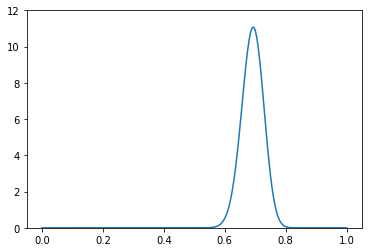

Posterior curve for Lisa


In [13]:
# Plotting posterior curve for Lisa
plot_beta(a, b, m, l, name = 'Results/posterior_Lisa.png')
print('Posterior curve for Lisa')

# Comparing the distributions

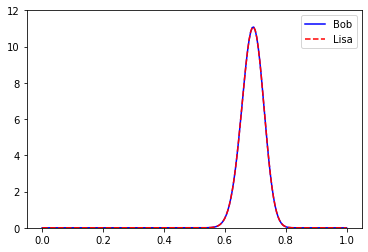

In [14]:
x = np.linspace(0, 1, 201)
y_bob = beta_pdf(x, a + h, b + t)
y_lisa = beta_pdf(x, a + m, b + l)
plt.figure()
plt.plot(x, y_bob, 'b-', label = 'Bob')
plt.plot(x, y_lisa, 'r--', label = 'Lisa')
plt.gca().set_ylim([0, 12])
plt.legend()
plt.savefig('Results/comparison.png')